In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

import os
import numpy as np
import seaborn as sns

In [4]:
csv_dir = '/home/elliot/Documents/CVPR_2020/BFA_defense/BFA_defense/save/2019-11-15/cifar10_resnet20_quan_idx_14'

csv_file_list = [file for file in os.listdir(
    csv_dir) if file.endswith('.csv')
]

# print(csv_file_list)

csv_dict = {}

for file in csv_file_list:
    if 'output_summary' in file:
        csv_dict[file] = pd.read_csv(os.path.join(csv_dir, file), index_col=False)

df = pd.concat([csv_dict[file] for file in csv_dict], ignore_index=True)

In [5]:
df

,top-1 output,BFA iteration
0,6,32
1,6,32
2,6,32
3,6,32
4,6,32
...,...,...
369995,6,31
369996,6,31
369997,6,31
369998,6,31


In [6]:
# plot style
sns.set(style="whitegrid")
sns.set(style="ticks")
# sns.despine()
sns.set_style({"font.sans-serif":"DejaVu Sans"})
sns.set_style({"grid.color":'0.9'})
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1})

# Label of CIFAR-10
info provided in:
https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c

/home/elliot/anaconda3/envs/pytorch041/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


([<matplotlib.axis.YTick at 0x7f6435aeee48>,
 <a list of 10 Text yticklabel objects>)

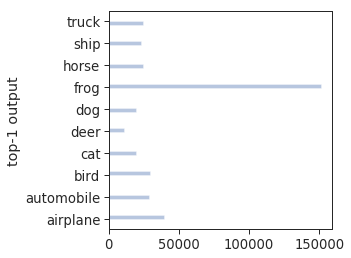

In [7]:
f, ax = plt.subplots(figsize=(4,4))
sns.distplot(df['top-1 output'], kde=False, vertical=True)
label_list = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# plt.xticks(np.arange(0, 10))
plt.yticks(np.arange(0, 10), label_list)

/home/elliot/anaconda3/envs/pytorch041/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyError: "None of [Index([''], dtype='object')] are in the [columns]"

# Evolution of output under BFA

In [111]:
csv_dir = '/home/elliot/Documents/CVPR_2020/BFA_defense/BFA_defense/save/2019-11-14/cifar10_resnet20_quan_idx_6'

csv_file_list = [file for file in os.listdir(
    csv_dir) if file.endswith('.csv')
]

# print(csv_file_list)

csv_dict = {}

for file in csv_file_list:
    if 'output_summary' in file:
        tmp_df = pd.read_csv(os.path.join(csv_dir, file), index_col=False)
        csv_dict[file] = tmp_df

df = pd.concat([csv_dict[file] for file in csv_dict], ignore_index=True)

In [112]:
# change the header of certain column
# https://stackoverflow.com/questions/19758364/rename-specific-columns-in-pandas 
try:
    df.rename(columns={'BFA iteration':'iter'}, inplace=True)
    df.rename(columns={'top-1 output':''}, inplace=True)
except:
    pass

# drop several iterations for less subfigures
# https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/
for i in [1,2,4,5,7,8,10,11]:
    # print(df[df['iter'] != i])
    df = df[df['iter'] != i]
    # df.drop(df['iter'] == i)

# df = pd.concat([df['iter']==iter for iter in [0,3,6,9,12]], ignore_index=True)


In [113]:
df

,,iter
0,0,6
1,6,6
2,9,6
3,6,6
4,6,6
...,...,...
119995,3,3
119996,0,3
119997,3,3
119998,8,3


/home/elliot/anaconda3/envs/pytorch041/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


([<matplotlib.axis.YTick at 0x7f5ad088ce80>,
 <a list of 0 Text yticklabel objects>)

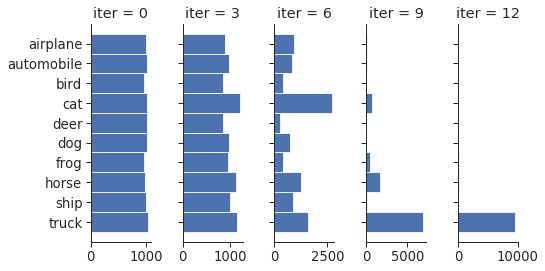

In [151]:
g = sns.FacetGrid(df, col="iter", margin_titles=False, size=4, aspect=0.35,
sharex=False)
g.map(plt.hist, "", orientation='horizontal', bins=np.arange(11)-0.5, align='mid')
# g.map(sns.distplot, "top-1 output", kde=False, vertical=True)
# plt.yticks(np.flip(np.arange(0,10)), label_list)
plt.yticks(np.flip(np.arange(0,10,1)), label_list)
# ax.set_yticklabels(label_list)

# for ax in g.axes.

In [153]:
g.fig.savefig(os.path.join(csv_dir,'BFA_output_evolution.pdf'), bbox_inches="tight", transparent=True)

# Single sample attack

/home/elliot/anaconda3/envs/pytorch041/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


([<matplotlib.axis.YTick at 0x7f642328b0f0>,
 <a list of 10 Text yticklabel objects>)

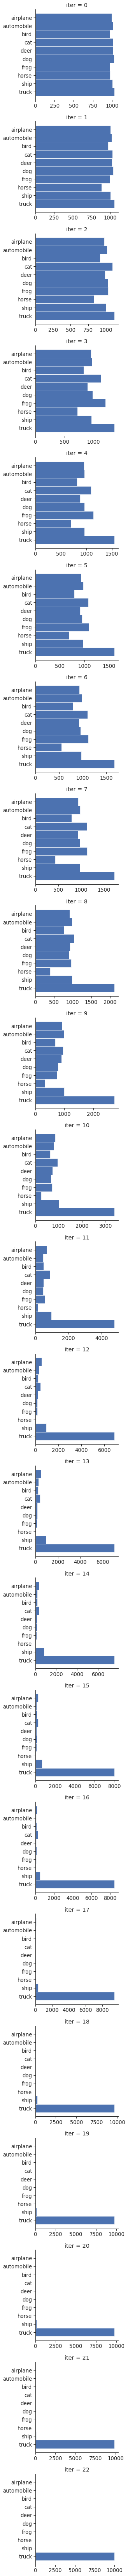

In [23]:
csv_dir = '/home/elliot/Documents/CVPR_2020/BFA_defense/BFA_defense/save/2019-11-15/cifar10_resnet20_quan_idx_11'

csv_file_list = [file for file in os.listdir(
    csv_dir) if file.endswith('.csv')
]

# print(csv_file_list)

csv_dict = {}

for file in csv_file_list:
    if 'output_summary' in file:
        tmp_df = pd.read_csv(os.path.join(csv_dir, file), index_col=False)
        csv_dict[file] = tmp_df

df = pd.concat([csv_dict[file] for file in csv_dict], ignore_index=True)

try:
    df.rename(columns={'BFA iteration':'iter'}, inplace=True)
    df.rename(columns={'top-1 output':''}, inplace=True)
except:
    pass

g = sns.FacetGrid(df, row="iter", margin_titles=False, size=4, aspect=1,
sharex=False)
g.map(plt.hist, "", orientation='horizontal', bins=np.arange(11)-0.5, align='mid')
# g.map(sns.distplot, "top-1 output", kde=False, vertical=True)
# plt.yticks(np.flip(np.arange(0,10)), label_list)
plt.yticks(np.flip(np.arange(0,10,1)), label_list)
# ax.set_yticklabels(label_list)

# for ax in g.axes.